In [23]:
import numpy as np
from matplotlib import pyplot as plt

from gimbal import cosmology_models as csm, collapse_models as clm, derivs

## Cosmology models

In [4]:
z = np.linspace(0, 3, 100)

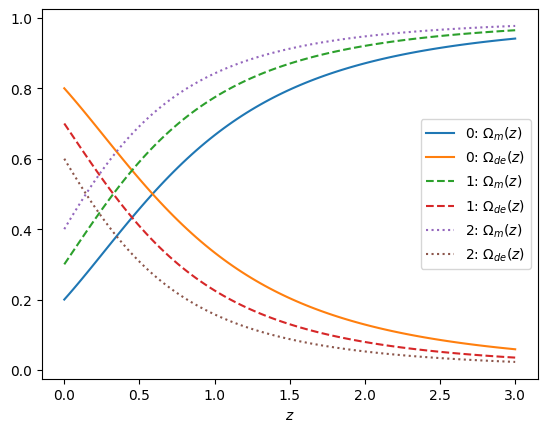

In [5]:
lcdm0 = csm.LCDM(0.7, 0.2)
lcdm1 = csm.LCDM(0.7, 0.3)
lcdm2 = csm.LCDM(0.7, 0.4)

plt.plot(z, lcdm0.omega_m(1/(z+1)), label=r'0: $\Omega_m(z)$')
plt.plot(z, lcdm0.omega_de(1/(z+1)), label=r'0: $\Omega_{de}(z)$')

plt.plot(z, lcdm1.omega_m(1/(z+1)), label=r'1: $\Omega_m(z)$', ls='--')
plt.plot(z, lcdm1.omega_de(1/(z+1)), label=r'1: $\Omega_{de}(z)$', ls='--')

plt.plot(z, lcdm2.omega_m(1/(z+1)), label=r'2: $\Omega_m(z)$', ls=':')
plt.plot(z, lcdm2.omega_de(1/(z+1)), label=r'2: $\Omega_{de}(z)$', ls=':')

plt.xlabel(r'$z$')
plt.legend()

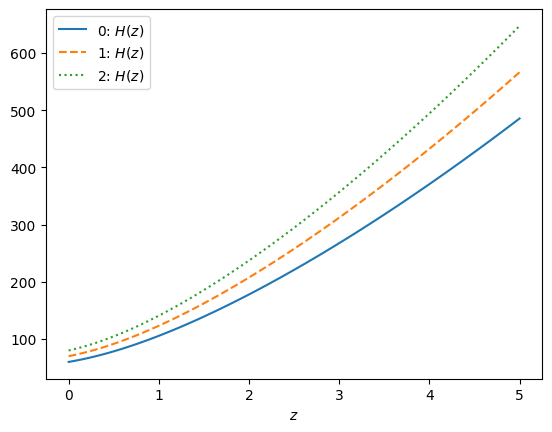

In [17]:
lcdm0 = csm.LCDM(0.6, 0.3)
lcdm1 = csm.LCDM(0.7, 0.3)
lcdm2 = csm.LCDM(0.8, 0.3)

z = np.linspace(0, 5, 100)

plt.plot(z, lcdm0.H(1/(z+1)), label=r'0: $H(z)$')

plt.plot(z, lcdm1.H(1/(z+1)), label=r'1: $H(z)$')

plt.plot(z, lcdm2.H(1/(z+1)), label=r'2: $H(z)$')

plt.xlabel(r'$z$')
plt.legend()

## Linear evolution of perturbations
Examples for GDE are similar.

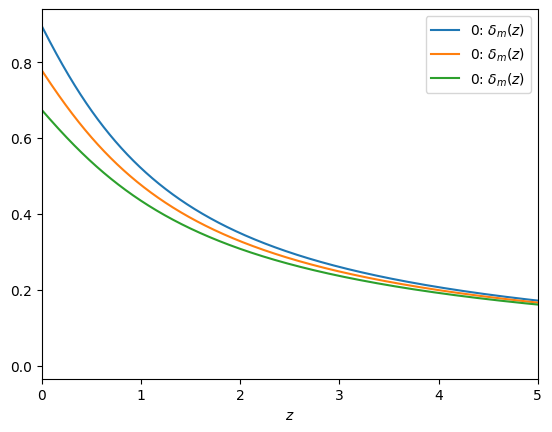

In [20]:
cmodel0 = clm.Gg2(cosmology=lcdm1, g2=-0.5)
cmodel1 = clm.Gg2(cosmology=lcdm1, g2=0)
cmodel2 = clm.Gg2(cosmology=lcdm1, g2=0.5)

# solves differential equation for delta
cmodel0.compute_equation()
cmodel1.compute_equation()
cmodel2.compute_equation()

# scale factors for the steps of delta are defined in `CollapseModel.vec_a`
plt.plot(1/cmodel0.vec_a-1, cmodel0.vec_delta_m, label=r'0: $\delta_m(z)$')

plt.plot(1/cmodel1.vec_a-1, cmodel1.vec_delta_m, label=r'0: $\delta_m(z)$')

plt.plot(1/cmodel2.vec_a-1, cmodel2.vec_delta_m, label=r'0: $\delta_m(z)$')

plt.xlim(0, 5)
plt.xlabel(r'$z$')
plt.legend()

It is possible to overwrite the scale factor step size with a parameter in the constructor. The parent class for the collapse models has the following parameters as constructors:
- `cosmology`: instance of `cosmology_models.CosmologyModel`. Defines background cosmology
- `z_i`: initial redshift
- `delta_m_i`: initial delta
- `d_delta_m_i`: derivative of initial delta. If None, it is calculated from EdS

And the following public variables:
- `a_i`: initial scale factor
- `vec_a`: geometric space vector for scale factor
- `vec_delta_m`: vector with all values of $\delta_m$
- `vec_d_delta_m`: vector with all values of $\delta_m^\prime$


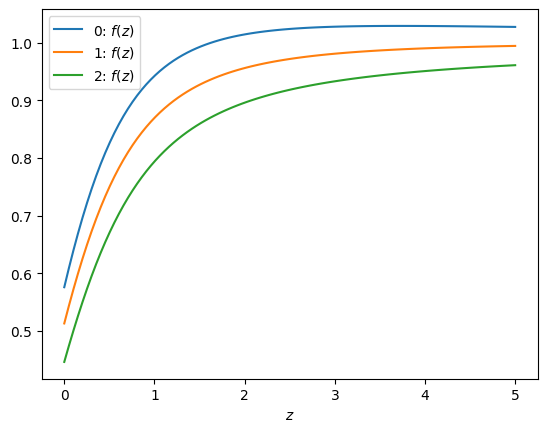

In [21]:
# even though the f function depends on the values of delta, it is interpolated
plt.plot(z, cmodel0.f(1/(1+z)), label=r'0: $f(z)$')

plt.plot(z, cmodel1.f(1/(1+z)), label=r'1: $f(z)$')

plt.plot(z, cmodel2.f(1/(1+z)), label=r'2: $f(z)$')

plt.xlabel(r'$z$')
plt.legend()

## Computing the growth index
As an example, let's compute the growth index for a range of values of $g_2$ under the LCDM cosmology.

Text(0.5, 0, '$g_2$')

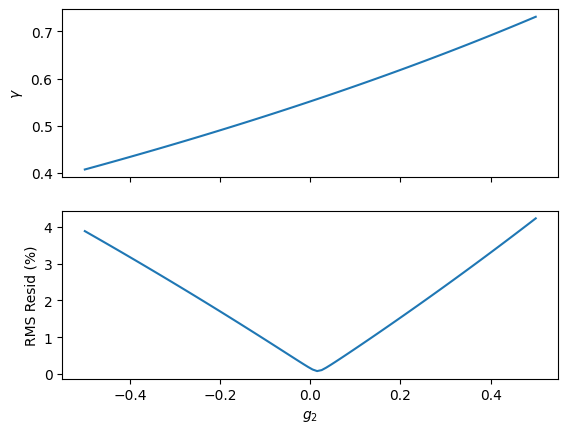

In [31]:
vec_g2 = np.linspace(-0.5, 0.5, 100)
vec_gamma = np.empty_like(vec_g2)
vec_resid = np.empty_like(vec_g2)

for i, g2 in enumerate(vec_g2):
    # note that the return format of get_best_gamma() is [best_gamma, best_gamma, rms_percent_residual]
    vec_gamma[i], _, vec_resid[i] = derivs.get_best_gamma(
        clm.Gg2(cosmology=lcdm1, g2=g2)  # generate the models varying g2
    )
    # note that get_best_gamma() automatically computes the differential equation to compute gamma

_, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.plot(vec_g2, vec_gamma)
ax1.plot(vec_g2, vec_resid)

ax0.set_ylabel(r'$\gamma$')
ax1.set_ylabel('RMS Resid (%)')
ax1.set_xlabel(r'$g_2$')
